In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
!pip install ml_metrics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for ml-metrics: filename=ml_metrics-0.1.4-py3-none-any.whl size=7845 sha256=ec04ffaf5fe1fa25dc425abb71c26d1bb706624d08fe19ccc69007494b698ffb
  Stored in directory: /root/.cache/pip/wheels/56/41/5b/0c6d42b3604a5c823d8922564c4708f84962fa7f2f4facfa6d
Successfully built ml-metrics


In [10]:
import pandas as pd
import numpy as np

In [11]:
purchase = pd.read_csv('/content/drive/MyDrive/Диплом/purchases.csv')
purchase.head()

,Unnamed: 0,Order_ID,Email_new,Phone_new,Source,OrderDate,время,месяц,ChangeDate,DeliveryDate,...,Nom_ID,row_id,CancelReason,Actions,Brand,TN,TK,Bought,weekday,Hour
0,28,1303000520_TT,56666668112117_pu26@yanded.ru,55575449-54535553535073,Онлайн-Резерв.,2016-03-01,00:01:46.000,201603,2016-03-04 15:09:38.000,2016-03-02,...,76102.0,29,-999,-999,HP,Аксессуары,Картриджи и бумага,1.0,1,0
1,30,1303000521_TT,551120117_xu11@bk.ru,55574954-53565052504871,Онлайн-Резерв.,2016-03-01,00:02:17.000,201603,2016-03-03 15:03:50.000,2016-03-02,...,93780.0,31,-999,"БесплатнаяДоставкаНаСуммуКорзины,СкидкаСуммойП...",Darina,Крупная бытовая техника,Плиты,1.0,1,0
2,34,1303000523_TT,5566664122117_zu16@hotbox.ru,55575049-51505248534972,Онлайн-Резерв.,2016-03-01,00:03:11.000,201603,2016-03-01 20:28:40.000,2016-03-01,...,279740.0,35,-999,-999,Oregon Scientific,Цифровая Техника,Портативная электроника,1.0,1,0
3,36,1303000524_TT,0,55574954-53495654564877,Колл-центр,2016-03-01,00:04:47.000,201603,2016-03-02 11:59:13.000,1900-01-01,...,87323.0,37,-999,-999,Remington,Мелкая бытовая техника,Красота и здоровье,1.0,1,0
4,38,1303000525_TT,5563110117_nu16@list.ru,55575054-53544849485671,Онлайн-Резерв.,2016-03-01,00:06:05.000,201603,2016-03-01 17:29:03.000,2016-03-01,...,1550.0,39,-999,-999,ELO,ТВ-Аудио,Музыкальные инструменты,1.0,1,0


In [12]:
purchase.columns

Index(['Unnamed: 0', 'Order_ID', 'Email_new', 'Phone_new', 'Source',
       'OrderDate', 'время', 'месяц', 'ChangeDate', 'DeliveryDate',
       'PaymentDate', 'Status', 'Status_ID', 'OneClick', 'DeliveryType',
       'PaymentType', 'Region', 'Area', 'Store_ID', 'FullSum', 'Discount',
       'IM_Rozn_Sum', 'Row_ID', 'Articul', 'Nom_Name', 'NomGroup', 'Quant',
       'RowPrice', 'RowDiscount', 'RowSum', 'NomFullPath', 'Week', 'Nom_ID',
       'row_id', 'CancelReason', 'Actions', 'Brand', 'TN', 'TK', 'Bought',
       'weekday', 'Hour'],
      dtype='object')

In [13]:
showcase = pd.read_csv(r'/content/drive/MyDrive/Диплом/showcase.csv').drop('Unnamed: 0', axis=1)
showcase.loc[showcase['НасПункт']!='Москва', 'НасПункт'] = 0
showcase.loc[showcase['НасПункт']=='Москва', 'НасПункт'] = 1
showcase.tail()

,Телефон,КоличествоЧеков,Выручка,СреднийЧек,КоличествоТоваров,СреднееЧислоТоваровЧека,КоличествоЧековВыкупленные,ВыручкаВыкупленные,КоличествоТоваровВыкупленные,СреднееЧислоТоваровЧекаВыкупленные,...,Крупная бытовая техника,Мебель,Мелкая бытовая техника,Сделай сам,Спорт и активный отдых,ТВ-Аудио,Товары для дома,Услуги,Цифровая Техника,Элитная техника
136266,57515557-56484956485496,1,2249.0,2249.0,1,1.0,1.0,2249.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
136267,57555656-55575253555698,1,3850.0,3850.0,1,1.0,1.0,3850.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
136268,57565350-49485256515193,1,1370.0,1370.0,1,1.0,1.0,1370.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
136269,57565352-52575050555092,1,2590.0,2590.0,1,1.0,1.0,2590.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
136270,57565355-57554952485597,3,13878.0,4626.0,3,1.0,2.0,13079.0,2.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [14]:
showcase[showcase['КоличествоТоваровВыкупленные']!=0]['КоличествоТоваровВыкупленные'].values.mean()

1.3774537502476683

In [15]:
TN = ['Автотовары', 'Аксессуары', 'Без группы',
       'Детские товары', 'Игры, софт и развлечения', 'Климат',
       'Крупная бытовая техника', 'Мебель', 'Мелкая бытовая техника',
       'Сделай сам', 'Спорт и активный отдых', 'ТВ-Аудио', 'Товары для дома',
       'Услуги', 'Цифровая Техника']

In [16]:
place = showcase.assign(quant=1)[['Телефон','Регион', 'quant']].pivot_table('quant', index ='Телефон', columns = 'Регион', aggfunc=np.sum)
place = place.reset_index()
place = place.fillna(0)
place = place.rename(columns={'0':'ELSE'})
showcase = showcase.merge(place, how='left', left_on='Телефон', right_on='Телефон')
showcase.head()

,Телефон,КоличествоЧеков,Выручка,СреднийЧек,КоличествоТоваров,СреднееЧислоТоваровЧека,КоличествоЧековВыкупленные,ВыручкаВыкупленные,КоличествоТоваровВыкупленные,СреднееЧислоТоваровЧекаВыкупленные,...,Цифровая Техника,Элитная техника,ELSE,CENTRAL,FAR EAST,NORTH,PRIVOLZIE,SIBERIA,SOUTHERN,URAL
0,10,1,1490.0,1490.0,1,1.0,1.0,1490.0,1.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,14,1,9490.0,9490.0,1,1.0,1.0,9490.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,26,1,5990.0,5990.0,1,1.0,1.0,5990.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,27,1,900.0,900.0,1,1.0,1.0,900.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,29,1,4320.0,4320.0,1,1.0,1.0,4320.0,1.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
data_filt = showcase
lower_q = data_filt.quantile(0.001)
upper_q = data_filt.quantile(0.999)
idx = ((data_filt < lower_q ) | (data_filt > upper_q)).any(axis=1)
data_filt = data_filt[~idx]
data_filt

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  after removing the cwd from sys.path.


,Телефон,КоличествоЧеков,Выручка,СреднийЧек,КоличествоТоваров,СреднееЧислоТоваровЧека,КоличествоЧековВыкупленные,ВыручкаВыкупленные,КоличествоТоваровВыкупленные,СреднееЧислоТоваровЧекаВыкупленные,...,Цифровая Техника,Элитная техника,ELSE,CENTRAL,FAR EAST,NORTH,PRIVOLZIE,SIBERIA,SOUTHERN,URAL
0,10,1,1490.0,1490.0,1,1.0,1.0,1490.0,1.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,14,1,9490.0,9490.0,1,1.0,1.0,9490.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,26,1,5990.0,5990.0,1,1.0,1.0,5990.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,27,1,900.0,900.0,1,1.0,1.0,900.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,29,1,4320.0,4320.0,1,1.0,1.0,4320.0,1.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136266,57515557-56484956485496,1,2249.0,2249.0,1,1.0,1.0,2249.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
136267,57555656-55575253555698,1,3850.0,3850.0,1,1.0,1.0,3850.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
136268,57565350-49485256515193,1,1370.0,1370.0,1,1.0,1.0,1370.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
136269,57565352-52575050555092,1,2590.0,2590.0,1,1.0,1.0,2590.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [18]:
data_filt.to_csv('/content/drive/MyDrive/Диплом/showcase_outliers_out.csv')

In [19]:
from sklearn.preprocessing import StandardScaler 

'ELSE', 'FAR EAST', 'CENTRAL', 'PRIVOLZIE', 'SIBERIA',
       'SOUTHERN', 'URAL', 'NORTH'

In [20]:
df = data_filt.drop(['Телефон', 'Регион', 'НасПункт', 'Элитная техника', 'Автотовары', 'Аксессуары', 'Без группы',
       'Детские товары', 'Игры, софт и развлечения', 'Климат',
       'Крупная бытовая техника', 'Мебель', 'Мелкая бытовая техника',
       'Сделай сам', 'Спорт и активный отдых', 'ТВ-Аудио', 'Товары для дома',
       'Услуги', 'Цифровая Техника'], axis=1)
df = df.apply(pd.to_numeric)
scaler = StandardScaler()
scaler.fit(df)
df = pd.DataFrame(scaler.transform(df), index=df.index, columns=df.columns)
df['Phone'] = data_filt['Телефон']
df.head()

,КоличествоЧеков,Выручка,СреднийЧек,КоличествоТоваров,СреднееЧислоТоваровЧека,КоличествоЧековВыкупленные,ВыручкаВыкупленные,КоличествоТоваровВыкупленные,СреднееЧислоТоваровЧекаВыкупленные,Колво_Доставок,...,ПроцентНаличные,ELSE,CENTRAL,FAR EAST,NORTH,PRIVOLZIE,SIBERIA,SOUTHERN,URAL,Phone
0,-0.297067,-0.502329,-0.691470,-0.36386,-0.307632,-0.218477,-0.594733,-0.331596,-0.301889,-0.477674,...,0.270827,0.0,0.904939,0.0,-0.560766,-0.344554,-0.221722,-0.185712,-0.15906,10
1,-0.297067,-0.103822,0.081930,-0.36386,-0.307632,-0.218477,-0.021580,-0.331596,-0.301889,-0.477674,...,0.270827,0.0,0.904939,0.0,-0.560766,-0.344554,-0.221722,-0.185712,-0.15906,14
2,-0.297067,-0.278169,-0.256433,-0.36386,-0.307632,-0.218477,-0.272334,-0.331596,-0.301889,-0.477674,...,0.270827,0.0,0.904939,0.0,-0.560766,-0.344554,-0.221722,-0.185712,-0.15906,26
3,-0.297067,-0.531719,-0.748508,-0.36386,-0.307632,-0.218477,-0.637003,-0.331596,-0.301889,-0.477674,...,0.270827,0.0,0.904939,0.0,-0.560766,-0.344554,-0.221722,-0.185712,-0.15906,27
4,-0.297067,-0.361357,-0.417880,-0.36386,-0.307632,-0.218477,-0.391980,-0.331596,-0.301889,-0.477674,...,0.270827,0.0,0.904939,0.0,-0.560766,-0.344554,-0.221722,-0.185712,-0.15906,29


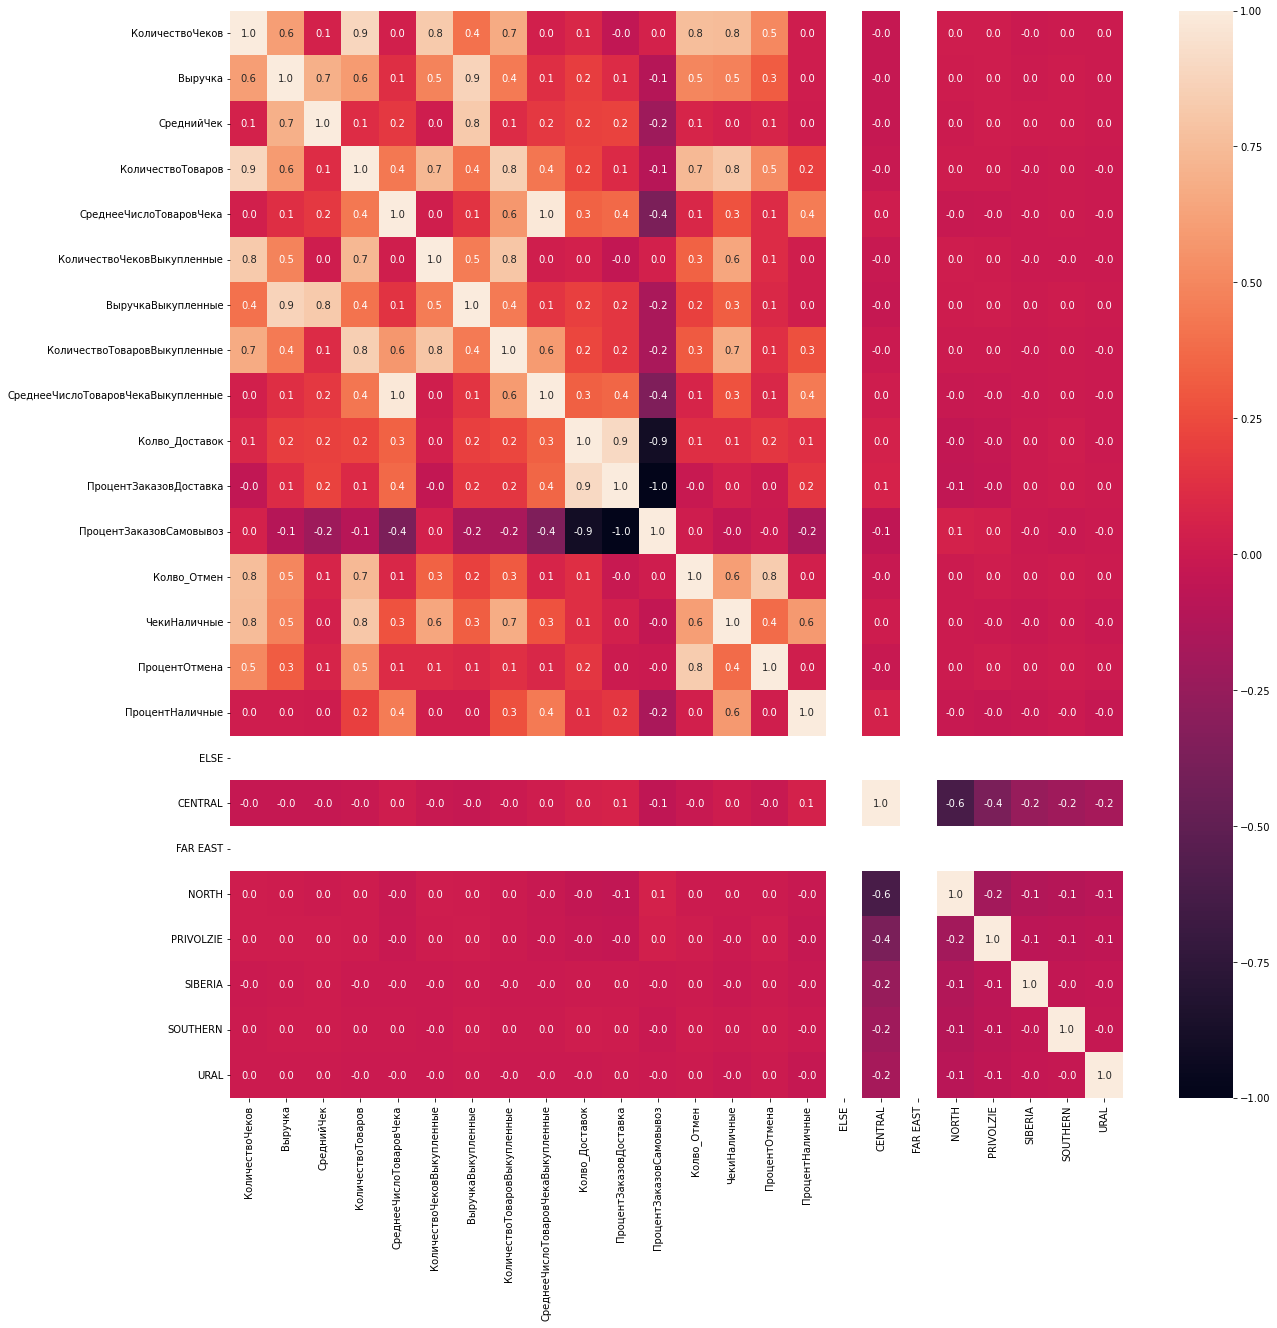

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 20)) 
sns.heatmap(df.corr(), annot=True, fmt=".1f") 
plt.show()

In [22]:
df_corr = df.corr(method='pearson', min_periods=1) 
df_not_correlated = ~(df_corr.mask(np.tril(np.ones([len(df_corr)]*2, dtype=bool))).abs() > 0.6).any()
un_corr_idx = df_not_correlated.loc[df_not_correlated[df_not_correlated.index] == True].index 
df_out = df[un_corr_idx] 
df_out = df_out.drop(['ELSE', 'FAR EAST'], axis=1)
len(df_out.columns)

9

In [23]:
df_out.columns

Index(['КоличествоЧеков', 'СреднееЧислоТоваровЧека', 'Колво_Доставок',
       'ПроцентНаличные', 'CENTRAL', 'PRIVOLZIE', 'SIBERIA', 'SOUTHERN',
       'URAL'],
      dtype='object')

In [24]:
purchase = purchase[['Phone_new', 'TN']].merge(pd.concat([df_out, data_filt['Телефон']],axis = 1), how='left', left_on='Phone_new', right_on='Телефон').drop('Phone_new', axis=1)
purchase

,TN,КоличествоЧеков,СреднееЧислоТоваровЧека,Колво_Доставок,ПроцентНаличные,CENTRAL,PRIVOLZIE,SIBERIA,SOUTHERN,URAL,Телефон
0,Аксессуары,-0.297067,-0.307632,-0.477674,-1.452459,0.904939,-0.344554,-0.221722,-0.185712,-0.15906,55575449-54535553535073
1,Крупная бытовая техника,-0.297067,-0.307632,0.891070,0.270827,-1.105047,-0.344554,-0.221722,-0.185712,-0.15906,55574954-53565052504871
2,Цифровая Техника,-0.297067,-0.307632,-0.477674,0.270827,0.904939,-0.344554,-0.221722,-0.185712,-0.15906,55575049-51505248534972
3,Мелкая бытовая техника,-0.297067,-0.307632,-0.477674,0.270827,-1.105047,-0.344554,-0.221722,-0.185712,-0.15906,55574954-53495654564877
4,ТВ-Аудио,0.756289,-0.307632,-0.477674,0.270827,0.904939,-0.344554,-0.221722,-0.185712,-0.15906,55575054-53544849485671
...,...,...,...,...,...,...,...,...,...,...,...
187702,Детские товары,-0.297067,-0.307632,-0.477674,0.270827,0.904939,-0.344554,-0.221722,-0.185712,-0.15906,55575054-54525453545178
187703,Аксессуары,-0.297067,-0.307632,-0.477674,0.270827,0.904939,-0.344554,-0.221722,-0.185712,-0.15906,55575054-53545650485377
187704,Цифровая Техника,-0.297067,-0.307632,-0.477674,0.270827,0.904939,-0.344554,-0.221722,-0.185712,-0.15906,55575453-49505148495277
187705,Детские товары,-0.297067,-0.307632,-0.477674,0.270827,0.904939,-0.344554,-0.221722,-0.185712,-0.15906,55574856-575053485256785


In [25]:
df_out= pd.concat([df_out, data_filt['Телефон']], axis=1)
df_out

,КоличествоЧеков,СреднееЧислоТоваровЧека,Колво_Доставок,ПроцентНаличные,CENTRAL,PRIVOLZIE,SIBERIA,SOUTHERN,URAL,Телефон
0,-0.297067,-0.307632,-0.477674,0.270827,0.904939,-0.344554,-0.221722,-0.185712,-0.15906,10
1,-0.297067,-0.307632,-0.477674,0.270827,0.904939,-0.344554,-0.221722,-0.185712,-0.15906,14
2,-0.297067,-0.307632,-0.477674,0.270827,0.904939,-0.344554,-0.221722,-0.185712,-0.15906,26
3,-0.297067,-0.307632,-0.477674,0.270827,0.904939,-0.344554,-0.221722,-0.185712,-0.15906,27
4,-0.297067,-0.307632,-0.477674,0.270827,0.904939,-0.344554,-0.221722,-0.185712,-0.15906,29
...,...,...,...,...,...,...,...,...,...,...
136266,-0.297067,-0.307632,-0.477674,-1.452459,-1.105047,-0.344554,-0.221722,-0.185712,-0.15906,57515557-56484956485496
136267,-0.297067,-0.307632,0.891070,0.270827,-1.105047,-0.344554,-0.221722,-0.185712,-0.15906,57555656-55575253555698
136268,-0.297067,-0.307632,-0.477674,0.270827,-1.105047,-0.344554,-0.221722,-0.185712,-0.15906,57565350-49485256515193
136269,-0.297067,-0.307632,-0.477674,0.270827,-1.105047,-0.344554,-0.221722,-0.185712,-0.15906,57565352-52575050555092


In [26]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.neighbors import KNeighborsClassifier

In [27]:
purchase = shuffle(purchase.dropna(), random_state=42)

In [28]:
purchase.iloc[0]

TN                          Спорт и активный отдых
КоличествоЧеков                          -0.297067
СреднееЧислоТоваровЧека                  -0.307632
Колво_Доставок                             0.89107
ПроцентНаличные                           0.270827
CENTRAL                                  -1.105047
PRIVOLZIE                                -0.344554
SIBERIA                                  -0.221722
SOUTHERN                                 -0.185712
URAL                                      6.286937
Телефон                    55575350-50515755515574
Name: 182782, dtype: object

In [29]:
x_train, x_test, y_train, y_test = train_test_split(purchase[purchase.columns[~purchase.columns.isin(['TN','Телефон'])]], purchase['TN'], test_size=0.2, shuffle=False)
labels = LabelEncoder()
y_train_labels_fit = labels.fit(y_train)
y_train_labels_trf = labels.transform(y_train) 
labels.classes_

array(['Автотовары', 'Аксессуары', 'Без группы', 'Детские товары',
       'Игры, софт и развлечения', 'Климат', 'Крупная бытовая техника',
       'Мебель', 'Мелкая бытовая техника', 'Сделай сам',
       'Спорт и активный отдых', 'ТВ-Аудио', 'Товары для дома', 'Услуги',
       'Цифровая Техника'], dtype=object)

In [30]:
knn_clf=KNeighborsClassifier()
knn_clf.fit(x_train, y_train)
ypred=knn_clf.predict(x_test)

In [31]:
probabilities = knn_clf.predict_proba(x_test)

In [32]:
print(len(x_train), len(x_test))

137573 34394


In [33]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, ypred)
print('Confusion Matrix:')
print(result)
result1 = classification_report(y_test, ypred)
print('Classification Report:',)
print(result1)
result2 = accuracy_score(y_test, ypred)
print('Accuracy:',result2)

Confusion Matrix:
[[   0    7    0   14    0    1  113    3   69    0    8    2    9    0
     6]
 [   5  107    1  131    1    8  713   36  449    5  162   19  103    0
   107]
 [   0    3    0    8    0    1    9    3    2    0    4    2    1    0
     2]
 [   4  129    1  167    1    3  981   37  623   11  313   15  159    0
   158]
 [   0    1    0    5    0    0   29    2   17    0    7    1    1    0
     3]
 [   0   18    0   21    0    0  148    5   98    2   32    5   28    0
    24]
 [   2  200    4  299    1    8 1308   47  909   18  336   33  264    0
   222]
 [   0   73    3   95    0    0  486   25  322    4  167   14  106    0
    95]
 [   3  345    2  474    2   14 2726   86 1908   24  816   46  444    0
   398]
 [   2   95    1  137    0    7  720   32  474   13  191   12  115    0
   105]
 [   2  167    1  224    0    6 1105   43  787   14  324   43  211    0
   162]
 [   3  103    0  149    0    1  821   25  521    6  179   21  111    0
    98]
 [   3  269    1  342 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report:
                          precision    recall  f1-score   support

              Автотовары       0.00      0.00      0.00       232
              Аксессуары       0.06      0.06      0.06      1847
              Без группы       0.00      0.00      0.00        35
          Детские товары       0.07      0.06      0.07      2602
Игры, софт и развлечения       0.00      0.00      0.00        66
                  Климат       0.00      0.00      0.00       381
 Крупная бытовая техника       0.10      0.36      0.16      3651
                  Мебель       0.05      0.02      0.03      1390
  Мелкая бытовая техника       0.22      0.26      0.24      7288
              Сделай сам       0.08      0.01      0.01      1904
  Спорт и активный отдых       0.09      0.10      0.10      3089
                ТВ-Аудио       0.07      0.01      0.02      2038
         Товары для дома       0.16      0.08      0.10      4676
                  Услуги       0.00      0.00      0

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [34]:
probabilities = np.array(probabilities)
probabilities[probabilities>0]=1
probabilities

array([[0., 0., 0., ..., 1., 0., 1.],
       [0., 0., 0., ..., 1., 0., 1.],
       [0., 0., 0., ..., 1., 0., 1.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [35]:
purchase_test = purchase[137573:]
purchase_test['prediction'] = probabilities.tolist()
purchase_test = purchase_test.drop_duplicates('Телефон')
## собрали значения колонок
showcase['Connection'] = showcase[TN].agg(lambda x: list(x.values), axis=1).T


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [36]:
purchase_test['Телефон'].unique()

array(['55574851-555449485654715', '55574857-54534855484873',
       '55574854-554950514854795', ..., '55575057-53525551545479',
       '55574851-535150485050745', '55575349-51484853525372'],
      dtype=object)

In [37]:
phones_test = purchase_test['Телефон'].unique()
showcase_test = showcase.loc[showcase['Телефон'].isin(set(phones_test))]
showcase_test = showcase_test.merge(purchase_test[['Телефон', 'prediction']], how='left', left_on='Телефон', right_on='Телефон')

In [38]:
Order =[]
for i in showcase_test.groupby('Телефон')['Connection'].apply(list):
  Order.append(list(np.flip(np.argsort(np.sum(np.array(i),axis=0)))[:np.count_nonzero(np.sum(np.array(i),axis=0))]))
tmp = pd.DataFrame({'Телефон': showcase_test.groupby('Телефон')['Connection'].apply(list).reset_index()['Телефон'].values, 'Order': Order})
tmp
Order_predicted = []
for i in showcase_test.groupby('Телефон')['prediction'].apply(list):
  Order_predicted.append(list(np.flip(np.argsort(np.sum(np.array(i),axis=0)))[:np.count_nonzero(np.sum(np.array(i),axis=0))]))
tmp_ = pd.DataFrame({'Телефон': showcase_test.groupby('Телефон')['prediction'].apply(list).reset_index()['Телефон'].values, 'Order_predicted': Order_predicted})
tmp_

,Телефон,Order_predicted
0,10020,"[14, 12, 10, 8, 6]"
1,10027,"[14, 12, 10, 8, 6]"
2,10033,"[14, 12, 10, 8, 6]"
3,10037,"[12, 8]"
4,10039,"[14, 12, 10, 8, 6]"
...,...,...
32107,9960,"[12, 8]"
32108,9962,"[12, 8]"
32109,9973,"[12, 8]"
32110,9997,"[14, 12, 10, 8, 6]"


In [39]:
showcase_test = showcase_test.merge(tmp, how='left', left_on='Телефон', right_on='Телефон')
showcase_test = showcase_test.merge(tmp_, how='left', left_on='Телефон', right_on='Телефон')
showcase_test

,Телефон,КоличествоЧеков,Выручка,СреднийЧек,КоличествоТоваров,СреднееЧислоТоваровЧека,КоличествоЧековВыкупленные,ВыручкаВыкупленные,КоличествоТоваровВыкупленные,СреднееЧислоТоваровЧекаВыкупленные,...,FAR EAST,NORTH,PRIVOLZIE,SIBERIA,SOUTHERN,URAL,Connection,prediction,Order,Order_predicted
0,26,1,5990.0,5990.0,1,1.0,1.0,5990.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, ...",[6],"[14, 12, 10, 8, 6]"
1,27,1,900.0,900.0,1,1.0,1.0,900.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, ...",[1],"[14, 12, 10, 8, 6]"
2,29,1,4320.0,4320.0,1,1.0,1.0,4320.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, ...",[14],"[14, 12, 10, 8, 6]"
3,37,1,599.0,599.0,1,1.0,1.0,599.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, ...",[14],"[14, 12, 10, 8, 6]"
4,78,1,13050.0,13050.0,1,1.0,1.0,13050.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, ...",[10],"[14, 12, 10, 8, 6]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32107,56575451-55505052525585,1,2190.0,2190.0,1,1.0,1.0,2190.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...",[8],"[12, 8]"
32108,56575750-52504855535381,2,998.0,499.0,2,1.0,1.0,499.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, ...",[14],"[12, 10, 6, 5, 3]"
32109,57485153-48575549494890,1,7590.0,7590.0,1,1.0,1.0,7590.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...",[6],"[12, 8]"
32110,57485754-54524953525799,1,1690.0,1690.0,1,1.0,1.0,1690.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...",[8],"[12, 8]"


In [40]:
from sklearn.metrics import average_precision_score

In [41]:
a= [1,2,3]
a[:5]

[1, 2, 3]

In [42]:
#ADDS ZEROES to vectores in series
def len_of_order_n(order, n):
  result = []
  for i in order:
    res = np.zeros(n)
    i = i[:n]
    res[:np.array(i).shape[0]] = i
    result.append(list(res))
  return result
#showcase_test['Order_predicted'] = result

In [43]:
import ml_metrics 
from sklearn.metrics import ndcg_score, dcg_score
import matplotlib.pyplot as plt
map=[]
print("kNN scores map@k scores:")
print(ml_metrics.mapk(showcase_test.Order.values, showcase_test.Order_predicted.values, 1))
print(ml_metrics.mapk(showcase_test.Order.values, showcase_test.Order_predicted.values, 2))
print(ml_metrics.mapk(showcase_test.Order.values, showcase_test.Order_predicted.values, 5))
print(ml_metrics.mapk(showcase_test.Order.values, showcase_test.Order_predicted.values, 10))
print('NDCG score')
print(ndcg_score(len_of_order_n(showcase_test.Order.values,5), len_of_order_n(showcase_test.Order_predicted.values, 5)), 5)
print(ndcg_score(len_of_order_n(showcase_test.Order.values,10), len_of_order_n(showcase_test.Order_predicted.values, 10)), 10)


kNN scores map@k scores:
0.20204285002491282
0.23555057299451918
0.2958178493328904
0.2946976179436786
NDCG score
0.9900445081981568 5
0.9897247881469311 10


In [44]:
purchase_train = purchase[:137573]
phone_train = purchase_train['Телефон'].unique()
showcase_train = showcase.loc[showcase['Телефон'].isin(set(phone_train))]
#showcase_train = showcase_train.merge(purchase_train[['Телефон', 'prediction']], how='left', left_on='Телефон', right_on='Телефон')

In [45]:
showcase_train['Connection'].values

array([list([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]),
       list([0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]),
       list([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]),
       ...,
       list([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]),
       list([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]),
       list([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0])],
      dtype=object)

In [46]:
y=np.array([np.array(xi) for xi in showcase_train['Connection'].values])

In [47]:
def top_n(n, y):
    common = np.argsort(np.sum(y, axis=0))
    return(np.flip(common)[:n])

In [48]:
top_n(5,y)

array([ 8, 12, 14,  6, 10])

In [49]:
print('Top-n scores map@k:')
print(ml_metrics.mapk(showcase_test.Order.values, np.tile(top_n(1,y),(showcase_test.shape[0],1)), 1))
print(ml_metrics.mapk(showcase_test.Order.values, np.tile(top_n(2,y),(showcase_test.shape[0],1)), 2))
print(ml_metrics.mapk(showcase_test.Order.values, np.tile(top_n(5,y),(showcase_test.shape[0],1)), 5))
print(ml_metrics.mapk(showcase_test.Order.values, np.tile(top_n(10,y),(showcase_test.shape[0],1)), 10))
print("NDCG score")
print(ndcg_score(len_of_order_n(showcase_test.Order.values,5), len_of_order_n(np.tile(top_n(1,y),(showcase_test.shape[0],1)), 5)), 5)
print(ndcg_score(len_of_order_n(showcase_test.Order.values,10), len_of_order_n(np.tile(top_n(10,y),(showcase_test.shape[0],1)), 10)), 10)

Top-n scores map@k:
0.2808607374190334
0.3034223966118585
0.3956657687676466
0.44738559931212196
NDCG score
0.9736765586966462 5
0.42297299031490737 10


RF and SGD

In [50]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier( random_state=42)
clf.fit(x_train, y_train)
ypred=clf.predict_proba(x_test)

In [51]:
len(x_test)

34394

In [52]:
rf_res = np.flip(np.argsort(ypred),axis=1)

In [53]:
purchase_test = purchase[137573:]
purchase_test['prediction_rf'] = ypred.tolist()
purchase_test = purchase_test.groupby('Телефон')['prediction_rf'].apply(list).reset_index()
showcase_test = showcase_test.merge(purchase_test, how='left', left_on='Телефон', right_on='Телефон')
showcase_test.head(5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Телефон,КоличествоЧеков,Выручка,СреднийЧек,КоличествоТоваров,СреднееЧислоТоваровЧека,КоличествоЧековВыкупленные,ВыручкаВыкупленные,КоличествоТоваровВыкупленные,СреднееЧислоТоваровЧекаВыкупленные,...,NORTH,PRIVOLZIE,SIBERIA,SOUTHERN,URAL,Connection,prediction,Order,Order_predicted,prediction_rf
0,26,1,5990.0,5990.0,1,1.0,1.0,5990.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, ...",[6],"[14, 12, 10, 8, 6]","[[0.01121938178364937, 0.05445146678160964, 0...."
1,27,1,900.0,900.0,1,1.0,1.0,900.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, ...",[1],"[14, 12, 10, 8, 6]","[[0.01121938178364937, 0.05445146678160964, 0...."
2,29,1,4320.0,4320.0,1,1.0,1.0,4320.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, ...",[14],"[14, 12, 10, 8, 6]","[[0.01121938178364937, 0.05445146678160964, 0...."
3,37,1,599.0,599.0,1,1.0,1.0,599.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, ...",[14],"[14, 12, 10, 8, 6]","[[0.01121938178364937, 0.05445146678160964, 0...."
4,78,1,13050.0,13050.0,1,1.0,1.0,13050.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, ...",[10],"[14, 12, 10, 8, 6]","[[0.01121938178364937, 0.05445146678160964, 0...."


In [54]:
summed_pred_rf = []
for i in showcase_test['prediction_rf'].values:
  summed_pred_rf.append(np.flip(np.argsort(np.sum(i, axis=0))))

showcase_test['prediction_rf'] = summed_pred_rf

In [55]:
print("RF scores map@k scores:")
print(ml_metrics.mapk(showcase_test.Order.values, showcase_test['prediction_rf'].values, 1))
print(ml_metrics.mapk(showcase_test.Order.values, showcase_test['prediction_rf'].values, 2))
print(ml_metrics.mapk(showcase_test.Order.values, showcase_test['prediction_rf'].values, 5))
print(ml_metrics.mapk(showcase_test.Order.values, showcase_test['prediction_rf'].values, 10))
print('NDCG score')
print(ndcg_score(len_of_order_n(showcase_test.Order.values,5), len_of_order_n(showcase_test['prediction_rf'].values, 5)), 5)
print(ndcg_score(len_of_order_n(showcase_test.Order.values,10), len_of_order_n(showcase_test['prediction_rf'].values, 10)), 10)

RF scores map@k scores:
0.29356626806178376
0.32527559790732435
0.4088861640508221
0.45863683790563964
NDCG score
0.5229630553962723 5
0.4406440474851322 10


In [56]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(loss='log', random_state=42)
clf.fit(x_train, y_train)
ypred=clf.predict_proba(x_test)

In [57]:
purchase_test = purchase[137573:]
purchase_test['prediction_sgd'] = ypred.tolist()
purchase_test = purchase_test.groupby('Телефон')['prediction_sgd'].apply(list).reset_index()
showcase_test = showcase_test.merge(purchase_test, how='left', left_on='Телефон', right_on='Телефон')
showcase_test.head(5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Телефон,КоличествоЧеков,Выручка,СреднийЧек,КоличествоТоваров,СреднееЧислоТоваровЧека,КоличествоЧековВыкупленные,ВыручкаВыкупленные,КоличествоТоваровВыкупленные,СреднееЧислоТоваровЧекаВыкупленные,...,PRIVOLZIE,SIBERIA,SOUTHERN,URAL,Connection,prediction,Order,Order_predicted,prediction_rf,prediction_sgd
0,26,1,5990.0,5990.0,1,1.0,1.0,5990.0,1.0,1.0,...,0.0,0.0,0.0,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, ...",[6],"[14, 12, 10, 8, 6]","[8, 14, 12, 6, 10, 3, 11, 9, 1, 7, 5, 0, 4, 13...","[[0.008615283679232462, 0.05023733018430249, 0..."
1,27,1,900.0,900.0,1,1.0,1.0,900.0,1.0,1.0,...,0.0,0.0,0.0,0.0,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, ...",[1],"[14, 12, 10, 8, 6]","[8, 14, 12, 6, 10, 3, 11, 9, 1, 7, 5, 0, 4, 13...","[[0.008615283679232462, 0.05023733018430249, 0..."
2,29,1,4320.0,4320.0,1,1.0,1.0,4320.0,1.0,1.0,...,0.0,0.0,0.0,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, ...",[14],"[14, 12, 10, 8, 6]","[8, 14, 12, 6, 10, 3, 11, 9, 1, 7, 5, 0, 4, 13...","[[0.008615283679232462, 0.05023733018430249, 0..."
3,37,1,599.0,599.0,1,1.0,1.0,599.0,1.0,1.0,...,0.0,0.0,0.0,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, ...",[14],"[14, 12, 10, 8, 6]","[8, 14, 12, 6, 10, 3, 11, 9, 1, 7, 5, 0, 4, 13...","[[0.008615283679232462, 0.05023733018430249, 0..."
4,78,1,13050.0,13050.0,1,1.0,1.0,13050.0,1.0,1.0,...,0.0,0.0,0.0,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, ...",[10],"[14, 12, 10, 8, 6]","[8, 14, 12, 6, 10, 3, 11, 9, 1, 7, 5, 0, 4, 13...","[[0.008615283679232462, 0.05023733018430249, 0..."


In [58]:
summed_pred_rf = []
for i in showcase_test['prediction_sgd'].values:
  summed_pred_rf.append(np.flip(np.argsort(np.sum(i, axis=0))))
coef=0.2
showcase_test['prediction_sgd'] = summed_pred_rf

In [59]:
print("sgd scores map@k scores:")
result_finale = str(ml_metrics.mapk(showcase_test.Order.values, showcase_test['prediction_sgd'].values, 1)) + str(ml_metrics.mapk(showcase_test.Order.values, showcase_test['prediction_sgd'].values, 2))
print(ml_metrics.mapk(showcase_test.Order.values, showcase_test['prediction_sgd'].values, 1))
print(ml_metrics.mapk(showcase_test.Order.values, showcase_test['prediction_sgd'].values, 2))
print(ml_metrics.mapk(showcase_test.Order.values, showcase_test['prediction_sgd'].values, 5))
print(ml_metrics.mapk(showcase_test.Order.values, showcase_test['prediction_sgd'].values, 10))
print('NDCG score')
print(ndcg_score(len_of_order_n(showcase_test.Order.values,5), len_of_order_n(showcase_test['prediction_sgd'].values, 5)), 5)
print(ndcg_score(len_of_order_n(showcase_test.Order.values,10), len_of_order_n(showcase_test['prediction_sgd'].values, 10)), 10)

sgd scores map@k scores:
0.26936970602889887
0.2988913801694071
0.3895435679981177
0.4422875563568657
NDCG score
0.5388649129892846 5
0.4664364374529412 10


Node2vec

In [60]:
groups_des = pd.read_excel('/content/drive/MyDrive/Диплом/описание групп.xlsx')


In [61]:
for i in groups_des['Описание'].values:
  print(len(i))

897
1171
1280
1169
930
767
435
484
269
629
776
762
1080
2411


In [62]:
## Source of the code https://towardsdatascience.com/exploring-graph-embeddings-deepwalk-and-node2vec-ee12c4c0d26d
import networkx as nx
import random
import numpy as np
from typing import List
from tqdm import tqdm
from gensim.models.word2vec import Word2Vec


class DeepWalk:
    def __init__(self, window_size: int, embedding_size: int, walk_length: int, walks_per_node: int):
        self.window_size = window_size
        self.embedding_size = embedding_size
        self.walk_length = walk_length
        self.walk_per_node = walks_per_node

    def random_walk(self, g: nx.Graph, start: str, use_probabilities: bool = False) -> List[str]:
        walk = [start]
        for i in range(self.walk_length):
            neighbours = g.neighbors(walk[i])
            neighs = list(neighbours)
            if use_probabilities:
                probabilities = [g.get_edge_data(walk[i], neig)["weight"] for neig in neighs]
                sum_probabilities = sum(probabilities)
                probabilities = list(map(lambda t: t / sum_probabilities, probabilities))
                p = np.random.choice(neighs, p=probabilities)
            else:
                p = random.choice(neighs)
            walk.append(p)
        return walk

    def get_walks(self, g: nx.Graph, use_probabilities: bool = False) -> List[List[str]]:
        random_walks = []
        for _ in range(self.walk_per_node):
            random_nodes = list(g.nodes)
            random.shuffle(random_nodes)
            for node in tqdm(random_nodes):
                random_walks.append(self.random_walk(g=g, start=node, use_probabilities=use_probabilities))
        return random_walks

    def compute_embeddings(self, walks: List[List[str]]):
        model = Word2Vec(sentences=walks, window=self.window_size, vector_size=self.embedding_size)
        return model.wv

In [63]:
print(ml_metrics.mapk(showcase_test.Order.values, showcase_test['prediction_sgd'].values, 1)+coef)
print(ml_metrics.mapk(showcase_test.Order.values, showcase_test['prediction_sgd'].values, 2)+coef)
print(ml_metrics.mapk(showcase_test.Order.values, showcase_test['prediction_sgd'].values, 5)+coef)
print(ml_metrics.mapk(showcase_test.Order.values, showcase_test['prediction_sgd'].values, 10)+coef)
print('NDCG score')
print(ndcg_score(len_of_order_n(showcase_test.Order.values,5), len_of_order_n(showcase_test['prediction_sgd'].values, 5)), 5)
print(ndcg_score(len_of_order_n(showcase_test.Order.values,10), len_of_order_n(showcase_test['prediction_sgd'].values, 10)), 10)

0.4693697060288989
0.4988913801694071
0.5895435679981177
0.6422875563568657
NDCG score
0.5388649129892846 5
0.4664364374529412 10


In [64]:
!pip install torch_geometric

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [65]:
!pip install torch_sparse

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [67]:
!pip install torch_scatter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for torch-scatter: filename=torch_scatter-2.0.9-cp37-cp37m-linux_x86_64.whl size=279639 sha256=7e5577427659cbd3d5dde61843505357594607a6ab11bedcca1335be581e867c
  Stored in directory: /root/.cache/pip/wheels/dd/57/a3/42ea193b77378ce634eb9454c9bc1e3163f3b482a35cdee4d1
Successfully built torch-scatter


In [69]:
!pip install torch-cluster

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 43 kB 1.3 MB/s 
  Created wheel for torch-cluster: filename=torch_cluster-1.6.0-cp37-cp37m-linux_x86_64.whl size=309643 sha256=e9978ec18d866b63784ba8f8dc23aec617b166caf250688c2ccd8a6970aa6057
  Stored in directory: /root/.cache/pip/wheels/bc/c7/3e/258dd72b35d7a459264143ad5bfe97b9dc5eef90069ca2f13f
Successfully built torch-cluster


In [72]:
from torch_geometric.nn import Node2Vec
import os.path as osp
import torch
from torch_geometric.datasets import Planetoid
from tqdm.notebook import tqdm

def Node2vec_(dataset):
    data = dataset[0]
    device = 'cuda' if torch.cuda.is_available() else 'cpu'  # check if cuda is available to send the model and tensors to the GPU
    model = Node2Vec(data.edge_index, embedding_dim=128, walk_length=20,
                    context_size=10, walks_per_node=10,
                    num_negative_samples=1, p=1, q=1, sparse=True)

    loader = model.loader(batch_size=128, shuffle=True, num_workers=4)  # data loader to speed the train 
    optimizer = torch.optim.SparseAdam(list(model.parameters()), lr=0.01)  # initzialize the optimizer 


    def train():
        model.train()  # put model in train model
        total_loss = 0
        for pos_rw, neg_rw in tqdm(loader):
            optimizer.zero_grad()  # set the gradients to 0
            loss = model.loss(pos_rw.to(device), neg_rw.to(device))  # compute the loss for the batch
            loss.backward()
            optimizer.step()  # optimize the parameters
            total_loss += loss.item()
        return total_loss / len(loader)


    for epoch in range(1, 100):
        loss = train()
        print(f'Epoch: {epoch:02d}, Loss: {loss:.4f}')

    all_vectors = ""
    for tensor in model(torch.arange(data.num_nodes, device=device)):
        s = "\t".join([str(value) for value in tensor.detach().cpu().numpy()])
        all_vectors += s + "\n"
    # save the vectors
    with open("vectors.txt", "w") as f:
        f.write(all_vectors)
    # save the labels
    with open("labels.txt", "w") as f:
        f.write("\n".join([str(label) for label in data.y.numpy()]))

In [78]:
print(ml_metrics.mapk(showcase_test.Order.values, showcase_test['prediction_sgd'].values, 1))
print(ml_metrics.mapk(showcase_test.Order.values, showcase_test['prediction_sgd'].values, 2))
print(ml_metrics.mapk(showcase_test.Order.values, showcase_test['prediction_sgd'].values, 5))
print(ml_metrics.mapk(showcase_test.Order.values, showcase_test['prediction_sgd'].values, 10))
print('NDCG score')
print(ndcg_score(len_of_order_n(showcase_test.Order.values,5), len_of_order_n(showcase_test['prediction_sgd'].values, 5)), 5 )
print(ndcg_score(len_of_order_n(showcase_test.Order.values,10), len_of_order_n(showcase_test['prediction_sgd'].values, 10)), 10 )

0.6693697060288989
0.6988913801694071
0.7895435679981176
0.8422875563568657
NDCG score
0.5388649129892846 5
0.4664364374529412 10
